# Team 1 - UFC Fighters


![](https://cdn.vox-cdn.com/thumbor/z_CMbdCm8HZrJh-lKL3GGjSKM-8=/0x0:2440x1627/1200x800/filters:focal(1212x228:1602x618)/cdn.vox-cdn.com/uploads/chorus_image/image/65759283/110_Robbie_Lawler_x_Ben_Askren.0.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rajeevw/ufcdata)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository.
- Submit your works through Google Form (Link on Learning Portal)

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

# Introduction

###  1. What is UFC?
The Ultimate Fighting Championship is a mixed-martial arts promotion in which a series of fights take place around the world.
There are more than 40 events each year.

### 2. What do these datasets contain?
There are 2 datasets. The first one contains basic information of each information such as: Name, Height, Weight, Stance, DOB.
The second dataset is a list of every UFC fight in the history of the organisation. Every row contains information about both fighters, their performance, their basic information and the winner.

### 3. Who is the target audience? 
Our target audience is coach of Danny Castillo - a 27-year-old Orthodox Lightweight fighter. He ased us to make research about every fighters to find strength, weakness of them and try to change these insights to advantages and winning strategy.

### 4. What are big questions?
How to improve the winning rate of our fighter?
- Which factor has the biggest impact to winning rate of Lightweight class?
- What are the strength and weakness of his opponents?
- Which is the strength and weakness of our fighter? And how to improve?
- Does our fighter need to change class to has higher chance to be champion?



In [5]:
fighter_performance[fighter_performance['class'] == 'Lightweight'].sample(5)

NameError: ignored

# Quick look and clean data

## Import libraries and data
- Mount drive with colab
- Clone the dataset from GitHub
- Import necessary libraries: Pandas, Numpy, Matplotlib.Pyplot, Re


In [6]:
# Start your codes here!
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [7]:
! git clone https://github.com/ttanh26/UFC.git

Cloning into 'UFC'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 2), reused 13 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

## Overview about the datasets



In [0]:
fighters = pd.read_csv('/content/UFC/fighters.csv')
matches = pd.read_csv('/content/UFC/matches.csv')

### I. Fighters dataset

#### 1. Quick look



**Information:** 
- Fighters dataset has 3313 rows with 6 columns.
- All data have object dtype. 
- There are many NaN values in the dataset, with the most missing value column is *Reach*. 
- And there is no duplicate value in this dataset.


In [10]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fighter_name  3313 non-null   object
 1   Height        3050 non-null   object
 2   Weight        3238 non-null   object
 3   Reach         1569 non-null   object
 4   Stance        2439 non-null   object
 5   DOB           2573 non-null   object
dtypes: object(6)
memory usage: 155.4+ KB


**Descriptive Statistic**: When all values are object dtypes.
- Most of fighters have the same height or weight.
- 6'0" and 170 lbs are the most common height and weight in UFC.
- There are only 5 stances in UFC now.
- More than 300 fighters have the same DOB with others.

In [11]:
fighters.describe()

,fighter_name,Height,Weight,Reach,Stance,DOB
count,3313,3050,3238,1569,2439,2573
unique,3313,27,108,25,5,2217
top,Steven Graham,"6' 0""",170 lbs.,"72""",Orthodox,"Aug 08, 1988"
freq,1,389,522,159,1913,4


### II. Matches dataset


#### 1. Quick look

**Information**:
- This dataset contains 5144 rows and 145 columns. 

- Each column contains 1 information of 1 fighters. So basically, each fighter's information is stored in 79 columns.

- There are 2 types of information in the dataset: 
  - **(1) Personal information**: contains information about name, height, weight, reach, stance, age of each fighter.
  - **(2) Statistical information**: contains statistics about his/her performance of 1 fighter.

- About datatypes:

|data type | Number of columns|
|:--:|--:|
|float64| 134 |
|object| 9|
|bool| 1|
|int64 | 1|


In [12]:
matches.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 145 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   R_fighter                     object 
 1   B_fighter                     object 
 2   Referee                       object 
 3   date                          object 
 4   location                      object 
 5   Winner                        object 
 6   title_bout                    bool   
 7   weight_class                  object 
 8   no_of_rounds                  int64  
 9   B_current_lose_streak         float64
 10  B_current_win_streak          float64
 11  B_draw                        float64
 12  B_avg_BODY_att                float64
 13  B_avg_BODY_landed             float64
 14  B_avg_CLINCH_att              float64
 15  B_avg_CLINCH_landed           float64
 16  B_avg_DISTANCE_att            float64
 17  B_avg_DISTANCE_landed         float64
 18  B_avg_GROUND_att           

In [13]:
matches.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,...,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,5144.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,...,5144.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,4494.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5140.000000,4828.000000,5141.000000,4972.000000,5080.000000
mean,3.119362,0.429821,0.837286,0.0,8.689387,6.083457,8.240461,5.556352,53.156807,19.329445,8.753818,5.772840,55.453012,19.816170,0.246404,6.008688,4.759009,1.278336,0.169168,70.151086,30.658636,0.456289,0.548063,2.804924,1.189461,0.315490,92.640431,50.709236,1.588453,1.463647,8.296830,5.639172,7.455382,4.922384,51.878991,18.225867,7.100088,4.632978,52.089755,17.367830,...,1.951400,8.156701,5.498694,7.344598,4.813048,52.159853,17.886244,6.611279,4.272593,52.001285,16.858422,0.154041,5.957743,4.614770,1.013822,0.160251,66.115730,26.971886,0.413343,0.449145,2.830869,1.023005,0.257887,86.275926,45.029754,12.853421,603.782645,0.597006,0.027605,0.280910,1.177294,1.254860,0.777605,0.071345,3.598173,179.274089,183.664412,172.075861,29.171963,29.442323
std,0.631457,0.731325,1.306203,0.0,7.087703,5.074464,7.575422,5.429531,41.252426,15.961112,8.756889,5.733290,36.335929,13.041234,0.340263,5.828103,4.617576,1.441323,0.323173,44.064103,18.744093,0.126533,0.714713,2.683049,1.249756,0.257901,50.707779,28.702729,1.785490,1.866391,6.679884,4.747421,7.035043,5.064395,41.117771,15.343885,8.534551,5.834105,36.015267,12.702911,...,2.118218,6.200441,4.242793,6.551358,4.549249,38.683510,14.233457,7.489661,4.760983,33.816262,11.670925,0.251969,5.151310,3.976328,1.297450,0.295486,41.143556,16.684679,0.115073,0.604606,2.317817,1.032374,0.221385,45.888909,24.711496,13.369351,227.777634,1.576711,0.166210,0.599936,1.600135,1.801056,1.326056,0.277771,3.709519,8.638978,10.304375,35.164075,4.078538,4.141927
min,1.000000,0.000000,0.000000,0.0,0.000

#### 2. Reshape the DataFrame for easier analyzing


##### 2.1 Split the matches dataset into 2 sub DataFrame: **red** and **blue**
When trying to understand more about this dataset, we splited the dataset into 2 sub table: Red table and blue table. Each table will contains every information of each fighters, except the general information about matches.

In [0]:
red_col = []
blue_col = []
for col in matches.columns:
  if re.findall(r'^R\_.*', col):
    red_col.append(col)
  if re.findall(r'^B\_.*', col):
    blue_col.append(col)

# Here is red table
red = matches[red_col]
red['date'] = matches['date']
red['match_index'] = matches.index
red['corner'] = 'Red'
red['class'] = matches['weight_class']

# Here is blue table
blue = matches[blue_col]
blue['date'] = matches['date']
blue['match_index'] = matches.index
blue['corner'] = 'Blue'
blue['class'] = matches['weight_class']

##### 2.2 Red table

**Information**:
- Have the same rows (5144) with **matches** but only contains 69 columns.
- There are only 2 dtypes: float64 (67) and object (2). 
- There are missing values (NaN) in most of columns in **red** dataset in 2 differenct ways:
  - All the columns containing statistical performance of fighter have the same number of NaN. (4494 Non-null count)
  - Columns which contain personal information of fighter have different number of NaN to each other.

In [15]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   R_fighter                     5144 non-null   object 
 1   R_current_lose_streak         5144 non-null   float64
 2   R_current_win_streak          5144 non-null   float64
 3   R_draw                        5144 non-null   float64
 4   R_avg_BODY_att                4494 non-null   float64
 5   R_avg_BODY_landed             4494 non-null   float64
 6   R_avg_CLINCH_att              4494 non-null   float64
 7   R_avg_CLINCH_landed           4494 non-null   float64
 8   R_avg_DISTANCE_att            4494 non-null   float64
 9   R_avg_DISTANCE_landed         4494 non-null   float64
 10  R_avg_GROUND_att              4494 non-null   float64
 11  R_avg_GROUND_landed           4494 non-null   float64
 12  R_avg_HEAD_att                4494 non-null   float64
 13  R_a

##### 2.3 Blue table

**Information**:
- Have the same rows (5144) with **matches** but only contains 69 columns.
- There are only 2 dtypes: float64 (67) and object (2). 
- There are missing values (NaN) in most of columns in **blue** dataset in 2 differenct ways:
  - All the columns containing statistical performance of fighter have the same number of NaN. (3879 Non-null count)
  - Columns which contain personal information of fighter have different number of NaN to each other.

In [16]:
blue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   B_fighter                     5144 non-null   object 
 1   B_current_lose_streak         5144 non-null   float64
 2   B_current_win_streak          5144 non-null   float64
 3   B_draw                        5144 non-null   float64
 4   B_avg_BODY_att                3879 non-null   float64
 5   B_avg_BODY_landed             3879 non-null   float64
 6   B_avg_CLINCH_att              3879 non-null   float64
 7   B_avg_CLINCH_landed           3879 non-null   float64
 8   B_avg_DISTANCE_att            3879 non-null   float64
 9   B_avg_DISTANCE_landed         3879 non-null   float64
 10  B_avg_GROUND_att              3879 non-null   float64
 11  B_avg_GROUND_landed           3879 non-null   float64
 12  B_avg_HEAD_att                3879 non-null   float64
 13  B_a

In [17]:
red.describe()

,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,match_index
count,5144.000000,5144.000000,5144.0,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,5144.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,4494.000000,5144.000000,4494.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5140.000000,4828.000000,5141.000000,5080.000000,5144.000000
mean,0.550933,1.000389,0.0,8.810613,6.137742,8.173583,5.525300,53.582091,19.551445,9.557208,6.324754,56.172935,20.266359,0.257743,6.329334,4.997399,1.413585,0.153263,71.312882,31.401499,0.463773,0.543083,3.026806,1.304724,0.333623,93.843077,51.523843,2.254082,1.951400,8.156701,5.498694,7.344598,4.813048,52.159853,17.886244,6.611279,4.272593,52.001285,16.858422,0.154041,5.957743,4.614770,1.013822,0.160251,66.115730,26.971886,0.413343,0.449145,2.830869,1.023005,0.257887,86.275926,45.029754,12.853421,603.782645,0.597006,0.027605,0.280910,1.177294,1.254860,0.777605,0.071345,3.598173,179.274089,183.664412,172.075861,29.442323,2571.500000
std,0.816019,1.579447,0.0,6.858203,4.800265,7.113069,5.114635,39.550361,15.071675,9.027138,5.971245,33.952758,12.035055,0.329755,5.893866,4.580976,1.457134,0.280728,41.633287,17.495162,0.121866,0.652865,2.796737,1.240269,0.241264,47.398572,26.826678,2.062174,2.118218,6.200441,4.242793,6.551358,4.549249,38.683510,14.233457,7.489661,4.760983,33.816262,11.670925,0.251969,5.151310,3.976328,1.297450,0.295486,41.143556,16.684679,0.115073,0.604606,2.317817,1.032374,0.221385,45.888909,24.711496,13.369351,227.777634,1.576711,0.166210,0.599936,1.600135,1.801056,1.326056,0.277771,3.709519,8.638978,10.304375,35.164075,4.141927,1485.089223
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,19.000000,0.000000
25%,0.000000,0.000000,0.0,4.000000,2.8

In [18]:
blue.describe()

,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,match_index
count,5144.000000,5144.000000,5144.0,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,5144.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,5144.000000,3879.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5136.000000,4478.000000,5138.000000,4972.000000,5144.000000
mean,0.429821,0.837286,0.0,8.689387,6.083457,8.240461,5.556352,53.156807,19.329445,8.753818,5.772840,55.453012,19.816170,0.246404,6.008688,4.759009,1.278336,0.169168,70.151086,30.658636,0.456289,0.548063,2.804924,1.189461,0.315490,92.640431,50.709236,1.588453,1.463647,8.296830,5.639172,7.455382,4.922384,51.878991,18.225867,7.100088,4.632978,52.089755,17.367830,0.160852,6.047876,4.774226,1.089235,0.153604,66.434461,27.781229,0.427182,0.462468,2.900511,1.094086,0.276465,86.975687,46.162715,8.920879,592.380954,0.279938,0.016913,0.212286,0.780132,0.872667,0.551516,0.045295,2.484448,179.238641,183.286128,172.110354,29.171963,2571.500000
std,0.731325,1.306203,0.0,7.087703,5.074464,7.575422,5.429531,41.252426,15.961112,8.756889,5.733290,36.335929,13.041234,0.340263,5.828103,4.617576,1.441323,0.323173,44.064103,18.744093,0.126533,0.714713,2.683049,1.249756,0.257901,50.707779,28.702729,1.785490,1.866391,6.679884,4.747421,7.035043,5.064395,41.117771,15.343885,8.534551,5.834105,36.015267,12.702911,0.286348,5.558551,4.483969,1.442978,0.309663,43.729026,18.249713,0.126842,0.652023,2.541909,1.169611,0.249678,48.577905,26.768730,11.269340,232.918270,1.116480,0.130457,0.526598,1.300199,1.545952,1.127524,0.219790,3.216861,8.515039,10.149180,36.847022,4.078538,1485.089223
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,0.000000
25%,0.000000,0.000000,0.0,3.500000,2.33

##### 2.4 Merge into a new one



We realized that both **red** table and **blue** table have same way of missing values of statisticical performance. And the main reason for these `NaN` values is: fighters who have `NaN` values about his/her performance in the past are all new fighters. Because our main target is to find the strength and weakness based on their fighting history, so for new fighter, we just drop them from DataFrame



In [19]:
# Fighters who have NaN values in his/her performance in the past are all new fighters
red[['R_avg_BODY_att', 'R_total_rounds_fought']][red['R_avg_BODY_att'].isna()].sample(10)

,R_avg_BODY_att,R_total_rounds_fought
2917,NaN,0.0
3577,NaN,0.0
4034,NaN,0.0
3202,NaN,0.0
4968,NaN,0.0
2328,NaN,0.0
1997,NaN,0.0
2918,NaN,0.0
382,NaN,0.0
4641,NaN,0.0


Combine red table and blue table into a new table, which is **fighter_information**

In [20]:
# Remove all the prefix 'R_' in red tables and save as a new list.
l = []
for col in red.columns:
  a = col.replace('R_', '', 1)
  l.append(a)

# Change columns' name of both red and blue tables with the new list.
red.columns = l
blue.columns = l

# Combine 2 table into a new one and drop the old index column
fighter_information = pd.concat([red, blue]).reset_index()
fighter_information.drop('index', axis =1, inplace= True)
fighter_information

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age,date,match_index,corner,class
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,2019-06-08,0,Red,Bantamweight
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.00,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,31.0,2019-06-08,1,Red,Women's Flyweight
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.60,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,2019-06-08,2,Red,Lightweight
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.00,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,2019-06-08,3,Red,Bantamweight
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,3.0,1.0,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.250000,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,0.397500,0.000000,1.000000,0.000000,0.00

In [21]:
fighter_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fighter                     10288 non-null  object 
 1   current_lose_streak         10288 non-null  float64
 2   current_win_streak          10288 non-null  float64
 3   draw                        10288 non-null  float64
 4   avg_BODY_att                8373 non-null   float64
 5   avg_BODY_landed             8373 non-null   float64
 6   avg_CLINCH_att              8373 non-null   float64
 7   avg_CLINCH_landed           8373 non-null   float64
 8   avg_DISTANCE_att            8373 non-null   float64
 9   avg_DISTANCE_landed         8373 non-null   float64
 10  avg_GROUND_att              8373 non-null   float64
 11  avg_GROUND_landed           8373 non-null   float64
 12  avg_HEAD_att                8373 non-null   float64
 13  avg_HEAD_landed             837

##### 2.5 Split to 2 new DataFrame due to difference in missing values
* *fighter_info* table contain personal information about each fighter.
* *fighter_performance* table contain information about fighters\' performance in the past.


In [22]:
# Split the fighter_information table into new 2 table: fighter_info and fighter_performance

# fighter_info table contains personal information of each fighter
fighter_info = fighter_information[['fighter', 'Stance', 'Height_cms', 'Reach_cms', 'Weight_lbs', 'age']]

# fighter_performance table contains his/her performance in the past
fighter_performance = fighter_information.drop(fighter_info.columns, axis = 1)
fighter_performance.insert(0, 'fighter', fighter_information['fighter'])


fighter_performance

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,date,match_index,corner,class
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,2019-06-08,0,Red,Bantamweight
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.00,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,2019-06-08,1,Red,Women's Flyweight
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.60,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,2019-06-08,2,Red,Lightweight
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.00,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,2019-06-08,3,Red,Bantamweight
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,3.0,1.0,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.250000,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,0.397500,0.000000,1.000000,0.000000,0.000000,60.500000,27.750000,7.0,440.75,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,2019-06-08,4,Red,Heavyweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

##### 2.6 Handle the missing value of **fighter_info** DataFrame

In [23]:
fighter_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fighter     10288 non-null  object 
 1   Stance      9995 non-null   object 
 2   Height_cms  10276 non-null  float64
 3   Reach_cms   9306 non-null   float64
 4   Weight_lbs  10279 non-null  float64
 5   age         10052 non-null  float64
dtypes: float64(4), object(2)
memory usage: 482.4+ KB


In [0]:
# The Reach is often equal to height of fighter, so we decide replacing NaN in 'Reach' columns with height of fighter.
fighter_info['Reach_cms'].fillna(value=fighter_info['Height_cms'], inplace=True)

In [25]:
# Before replace Age
fighter_info.describe()

,Height_cms,Reach_cms,Weight_lbs,age
count,10276.000000,10278.000000,10279.000000,10052.000000
mean,179.256372,183.351771,172.093102,29.308595
std,8.576857,10.029231,36.013386,4.112713
min,152.400000,152.400000,115.000000,18.000000
25%,172.720000,177.800000,145.000000,26.000000
50%,180.340000,182.880000,170.000000,29.000000
75%,185.420000,190.500000,185.000000,32.000000
max,210.820000,213.360000,770.000000,51.000000


In [0]:
# Replace Age
fighter_info['age'].fillna(value=np.random.randint(25, 33), inplace=True)

In [27]:
# After replace Age
fighter_info.describe()

,Height_cms,Reach_cms,Weight_lbs,age
count,10276.000000,10278.000000,10279.000000,10288.000000
mean,179.256372,183.351771,172.093102,29.370334
std,8.576857,10.029231,36.013386,4.085185
min,152.400000,152.400000,115.000000,18.000000
25%,172.720000,177.800000,145.000000,26.000000
50%,180.340000,182.880000,170.000000,29.000000
75%,185.420000,190.500000,185.000000,32.000000
max,210.820000,213.360000,770.000000,51.000000


##### 2.7 Handle the missing value of fighter_performance DataFrame

In [28]:
# Before cleaning
fighter_performance.tail()

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,date,match_index,corner,class
10283,Kevin Rosier,0.0,1.0,0.0,4.0,3.0,9.0,4.0,10.0,4.0,8.0,7.0,23.0,12.0,2.0,0.0,0.0,0.0,0.0,27.0,15.0,0.55,0.0,0.0,0.0,0.0,53.0,38.0,1.0,0.0,6.0,3.0,19.0,10.0,7.0,0.0,2.0,2.0,19.0,7.0,0.0,3.0,2.0,0.0,0.0,28.0,12.0,0.42,0.0,0.0,0.0,0.0,29.0,13.0,1.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1993-11-12,5139,Blue,Open Weight
10284,Patrick Smith,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993-11-12,5140,Blue,Open Weight
10285,Art Jimmerson,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993-11-12,5141,Blue,Open Weight
10286,Zane Frazier,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993-11-12,5142,Blue,Open Weight
10287,Teila Tuli,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993-11-12,5143,Blue,Open Weight


In [0]:
# Drop all the missing value in fighter_performance
fighter_performance.dropna(how = 'any', inplace= True)

In [30]:
# After cleaning missing value
fighter_performance.tail()

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,date,match_index,corner,class
10269,Orlando Wiet,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,9.0,7.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0,12.0,8.0,0.66,0.0,0.0,0.0,0.0,15.0,11.0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0,0.0,6.0,2.0,0.33,1.0,1.0,1.0,1.0,6.0,2.0,1.0,170.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1994-03-11,5125,Blue,Open Weight
10271,Scott Morris,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.00,0.0,0.0,0.0,0.0,5.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1994-03-11,5127,Blue,Open Weight
10280,Gerard Gordeau,0.0,2.0,0.0,0.5,0.5,0.0,0.0,5.5,3.0,5.5,4.0,9.0,5.0,0.5,1.5,1.5,0.0,0.0,11.0,7.0,0.62,0.0,0.0,0.0,0.0,11.0,7.0,2.0,0.0,0.5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.0,0.0,0.0,2.0,0.0,0.00,0.0,0.5,0.0,0.0,2.0,0.0,2.0,42.5,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,1993-11-12,5136,Blue,Catch Weight
10282,Ken Shamrock,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.00,2.0,2.0,1.0,0.5,4.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,4.0,1.0,0.0,3.0,2.0,0.0,0.0,8.0,4.0,0.50,0.0,0.0,0.0,0.0,20.0,16.0,1.0,109.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1993-11-12,5138,Blue,Open Weight
10283,Kevin Rosier,0.0,1.0,0.0,4.0,3.0,9.0,4.0,10.0,4.0,8.0,7.0,23.0,12.0,2.0,0.0,0.0,0.0,0.0,27.0,15.0,0.55,0.0,0.0,0.0,0.0,53.0,38.0,1.0,0.0,6.0,3.0,19.0,10.0,7.0,0.0,2.0,2.0,19.0,7.0,0.0,3.0,2.0,0.0,0.0,28.0,12.0,0.42,0.0,0.0,0.0,0.0,29.0,13.0,1.0,260.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1993-11-12,5139,Blue,Open Weight


##### 2.8 Remove the duplicate rows 

In [0]:
# Because one fighter could fight in many different UFC events and we just need the most recent performance of that fighter. 
# So we drop duplicates rows which have the same fighter name and keep the first occurences in the DataFrame. (DataFrame has been sorted in descending date value) 

fighter_performance.drop_duplicates('fighter', keep= 'first', inplace= True)
fighter_performance.reset_index(inplace= True)
fighter_performance.drop('index', axis= 1, inplace= True)


In [32]:
fighter_performance

,fighter,current_lose_streak,current_win_streak,draw,avg_BODY_att,avg_BODY_landed,avg_CLINCH_att,avg_CLINCH_landed,avg_DISTANCE_att,avg_DISTANCE_landed,avg_GROUND_att,avg_GROUND_landed,avg_HEAD_att,avg_HEAD_landed,avg_KD,avg_LEG_att,avg_LEG_landed,avg_PASS,avg_REV,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,avg_SUB_ATT,avg_TD_att,avg_TD_landed,avg_TD_pct,avg_TOTAL_STR_att,avg_TOTAL_STR_landed,longest_win_streak,losses,avg_opp_BODY_att,avg_opp_BODY_landed,avg_opp_CLINCH_att,avg_opp_CLINCH_landed,avg_opp_DISTANCE_att,avg_opp_DISTANCE_landed,avg_opp_GROUND_att,avg_opp_GROUND_landed,avg_opp_HEAD_att,avg_opp_HEAD_landed,avg_opp_KD,avg_opp_LEG_att,avg_opp_LEG_landed,avg_opp_PASS,avg_opp_REV,avg_opp_SIG_STR_att,avg_opp_SIG_STR_landed,avg_opp_SIG_STR_pct,avg_opp_SUB_ATT,avg_opp_TD_att,avg_opp_TD_landed,avg_opp_TD_pct,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,total_rounds_fought,total_time_fought(seconds),total_title_bouts,win_by_Decision_Majority,win_by_Decision_Split,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,date,match_index,corner,class
0,Henry Cejudo,0.0,4.0,0.0,21.900000,16.400000,17.000000,11.000000,75.000000,26.500000,9.400000,6.500000,74.200000,23.90,0.400,5.300000,3.700000,1.200000,0.000000,101.400000,44.000000,0.466000,0.100000,5.300000,1.900000,0.458000,129.900000,69.100000,4.0,2.0,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,2019-06-08,0,Red,Bantamweight
1,Valentina Shevchenko,0.0,2.0,0.0,12.000000,7.714286,9.285714,6.857143,88.142857,36.142857,18.428571,16.428571,84.571429,37.00,0.000,19.285714,14.714286,1.714286,0.142857,115.857143,59.428571,0.575714,0.428571,5.142857,2.428571,0.601429,161.571429,102.857143,2.0,2.0,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,2019-06-08,1,Red,Women's Flyweight
2,Tony Ferguson,0.0,11.0,0.0,13.866667,8.666667,2.866667,1.733333,116.133333,49.466667,5.333333,4.266667,96.733333,35.60,0.200,13.733333,11.200000,0.333333,0.133333,124.333333,55.466667,0.430000,1.000000,0.933333,0.400000,0.277333,133.000000,63.400000,11.0,1.0,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,2019-06-08,2,Red,Lightweight
3,Jimmie Rivera,1.0,0.0,0.0,18.250000,10.250000,5.875000,4.125000,104.875000,41.000000,1.000000,0.625000,80.500000,24.00,0.375,13.000000,11.500000,0.125000,0.000000,111.750000,45.750000,0.366250,0.000000,2.250000,0.625000,0.103750,117.375000,50.750000,5.0,2.0,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25,0.0,0.0,1.0,4.0,1.0,0.0,0.0,6.0,2019-06-08,3,Red,Bantamweight
4,Tai Tuivasa,1.0,0.0,0.0,7.750000,6.750000,11.000000,7.250000,50.750000,24.750000,0.500000,0.500000,50.750000,22.75,0.500,3.750000,3.000000,0.250000,0.000000,62.250000,32.500000,0.545000,0.000000,0.500000,0.000000,0.000000,63.500000,32.750000,3.0,1.0,6.250000,4.750000,4.500000,3.500000,42.750000,16.250000,7.750000,2.750000,43.250000,14.000000,0.250000,5.500000,3.750000,0.750000,0.000000,55.000000,22.500000,0.397500,0.000000,1.000000,0.000000,0.000000,60.500000,27.750000,7.0,440.75,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,2019-06-08,4,Red,Heavyweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

##### 2.9 The final dataset for analyzing 

In [33]:
# There are 2 problems we still can't handle with: The data is not up-to-date with every fighter or some fighter have retired or changed their class. Therefore, maybe the insights from this data have lower accuracy.
# Here is our main dataset after removing duplicates and filling missing values.
lightweight = fighter_performance[fighter_performance['class'] == 'Lightweight']

lightweight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 2 to 1519
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fighter                     265 non-null    object 
 1   current_lose_streak         265 non-null    float64
 2   current_win_streak          265 non-null    float64
 3   draw                        265 non-null    float64
 4   avg_BODY_att                265 non-null    float64
 5   avg_BODY_landed             265 non-null    float64
 6   avg_CLINCH_att              265 non-null    float64
 7   avg_CLINCH_landed           265 non-null    float64
 8   avg_DISTANCE_att            265 non-null    float64
 9   avg_DISTANCE_landed         265 non-null    float64
 10  avg_GROUND_att              265 non-null    float64
 11  avg_GROUND_landed           265 non-null    float64
 12  avg_HEAD_att                265 non-null    float64
 13  avg_HEAD_landed             265 no

Quick look:
- There are 265 Lightweight fighters in UFC from 1993 - 2019.
- Each row contains about 68 information about each fighter.
- Information of a fighter could be categorized into 4 main categories:
  - Damage done.
  - Damage received by opponents.
  - Winning method
  - Others.

# Some analysis about the Lightweight class <br>


## About win streak

### 1. Top 5 Lightweight fighter have longest win streak. Who are they?

In [91]:
# Who has longest win streak in Lightweight?
a = lightweight[['fighter', 'longest_win_streak']].sort_values(by = 'longest_win_streak', ascending = False).iloc[:5]
a

,fighter,longest_win_streak
81,Max Holloway,13.0
2,Tony Ferguson,11.0
270,Khabib Nurmagomedov,10.0
274,Gray Maynard,8.0
278,Francisco Trinaldo,7.0


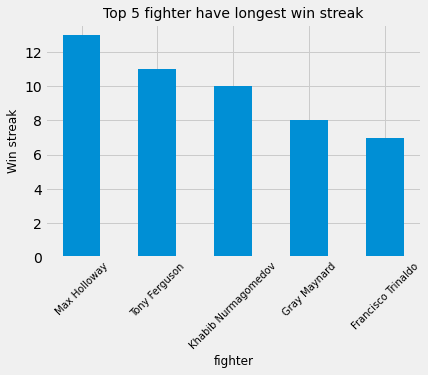

In [92]:
#@title Top 5 Lightweight fighter have longest win streak
a = a.iloc[:5]
plt.style.use('fivethirtyeight')
plt.bar(a['fighter'], a['longest_win_streak'], width= 0.5)
plt.xticks(a['fighter'], rotation = 45, size = 10)
plt.xlabel('fighter', fontdict= {'fontsize': 12})
plt.ylabel('Win streak', fontdict= {'fontsize': 12})
plt.title('Top 5 fighter have longest win streak', fontdict= {'fontsize': 14})
# plt.style.available
plt.show()

### 2. What is the distribution of win streak in Lightweight class?

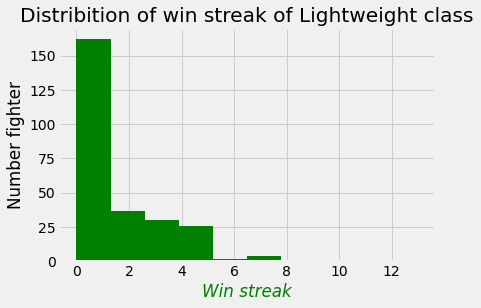

In [36]:
#@title Distribution of win streak of Lightweight class

a = lightweight[['longest_win_streak']]
a.describe()
a['longest_win_streak'].shape
plt.hist(x= a['longest_win_streak'], color = 'green')
plt.xlabel('Win streak', fontdict={'color': 'green',
                                   'fontstyle': 'oblique'})
plt.ylabel('Number fighter')
plt.title('Distribition of win streak of Lightweight class')
plt.show()

## About the total strike 

### 1. Distribution of total strike attempts and landed in UFC Lightweight class

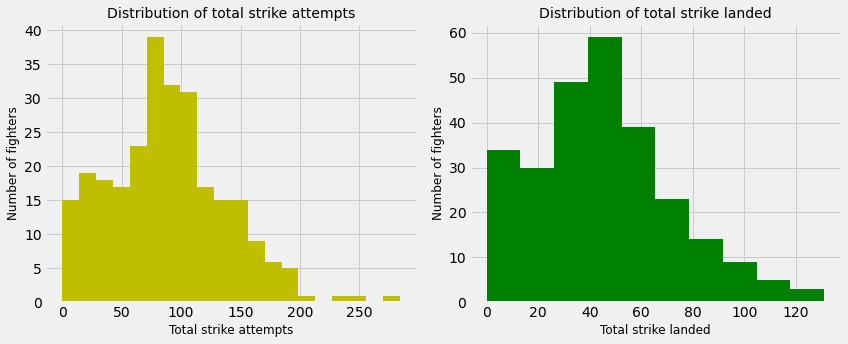

In [88]:
#@title Distribution of total strike attempts and landed in UFC Lightweight
a = lightweight[['avg_TOTAL_STR_att', 'avg_TOTAL_STR_landed']]
a.describe()

plt.subplots(1, 2, figsize = (12, 5))
plt.subplot(1,2,1)
plt.hist(a['avg_TOTAL_STR_att'], bins = 20, color = 'y')
plt.xlabel('Total strike attempts', fontdict= {'fontsize' : 12})
plt.ylabel('Number of fighters', fontdict= {'fontsize' : 12})
plt.title('Distribution of total strike attempts', fontdict= {'fontsize' : 14})

plt.subplot(1,2,2)
plt.hist(a['avg_TOTAL_STR_landed'], color = 'g')
plt.xlabel('Total strike landed', fontdict= {'fontsize' : 12})
plt.ylabel('Number of fighters', fontdict= {'fontsize' : 12})
plt.title('Distribution of total strike landed', fontdict= {'fontsize' : 14})


plt.tight_layout()
plt.show()


### 2. Top 5 fighters who have most strike (attempts and landed)

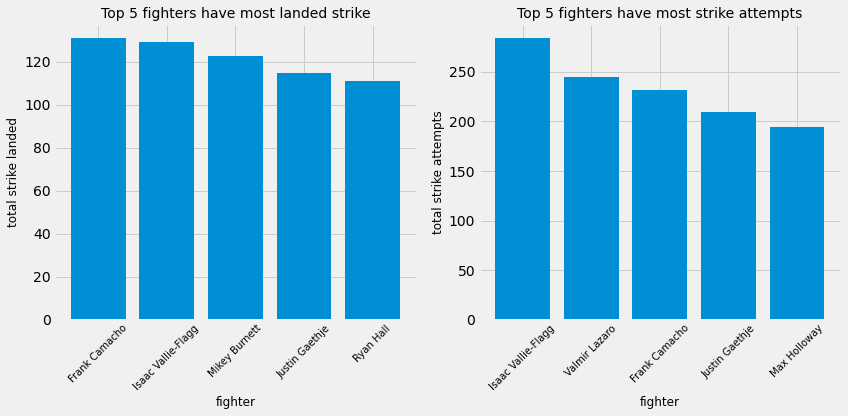

In [87]:
#@title Top 5 fighters who have most strike attempts and landed
a =lightweight[['fighter', 'avg_TOTAL_STR_landed']].sort_values('avg_TOTAL_STR_landed', ascending = False).iloc[:5]
b = lightweight[['fighter', 'avg_TOTAL_STR_att']].sort_values('avg_TOTAL_STR_att', ascending = False).iloc[:5]

plt.subplots(1, 2, figsize = (12, 6))
plt.subplot(121)
plt.bar(a['fighter'], a['avg_TOTAL_STR_landed'])
plt.xlabel('fighter', fontdict= {'fontsize': 12})
plt.xticks(a['fighter'], rotation = 45, size =10)
plt.ylabel('total strike landed', fontdict= {'fontsize': 12})
plt.title('Top 5 fighters have most landed strike', fontdict= {'fontsize': 14})

plt.subplot(122)
plt.bar(b['fighter'], b['avg_TOTAL_STR_att'])
plt.xlabel('fighter', fontdict= {'fontsize': 12})
plt.xticks(b['fighter'], rotation = 45, size = 10)
plt.ylabel('total strike attempts', fontdict= {'fontsize': 12})
plt.title('Top 5 fighters have most strike attempts', fontdict= {'fontsize': 14})

plt.tight_layout()
plt.show()

## About the significant strike

### 1. Distribution of significant strike (landed and attempts)

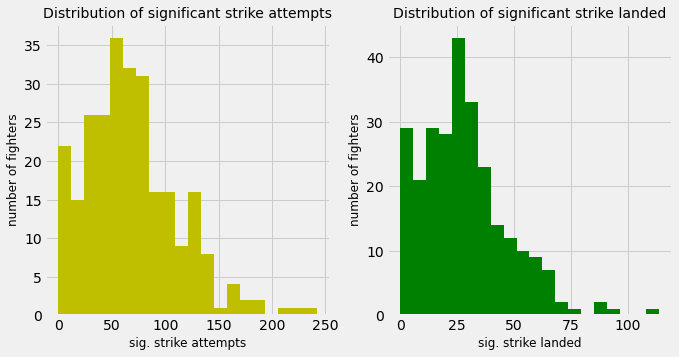

In [86]:
#@title Distribution of significant strike
a =lightweight[['avg_SIG_STR_att', 'avg_SIG_STR_landed', 'avg_SIG_STR_pct']]
a.describe()

plt.subplots(1,2, figsize = (10, 5))
plt.subplot(1,2,1)
plt.hist(a['avg_SIG_STR_att'],bins = 20, color = 'y')
plt.xlabel('sig. strike attempts', fontdict= {'fontsize': 12})
plt.ylabel('number of fighters', fontdict= {'fontsize': 12})
plt.title('Distribution of significant strike attempts', fontdict= {'fontsize': 14})

plt.subplot(1,2,2)
plt.hist(a['avg_SIG_STR_landed'], bins = 20, color = 'g')
plt.xlabel('sig. strike landed', fontdict= {'fontsize': 12})
plt.ylabel('number of fighters', fontdict= {'fontsize': 12})
plt.title('Distribution of significant strike landed', fontdict= {'fontsize': 14})
plt.show()

### 2. Top 5 fighters who have most significant strike (landed and attempts)


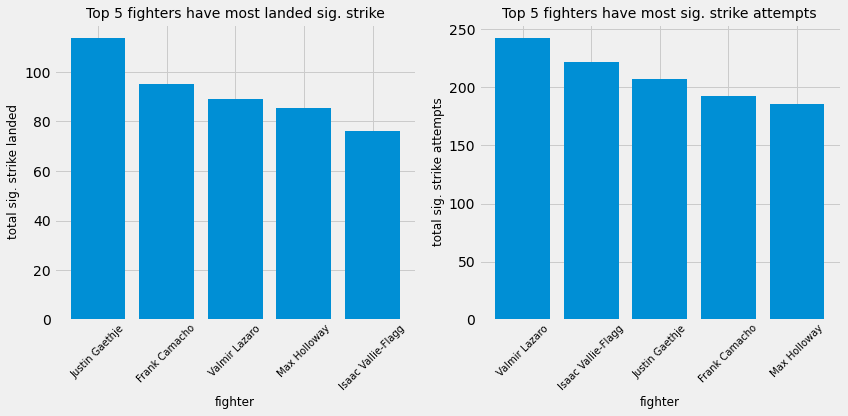

In [85]:
#@title 
a =lightweight[['fighter', 'avg_SIG_STR_landed']].sort_values('avg_SIG_STR_landed', ascending = False).iloc[:5]
b = lightweight[['fighter', 'avg_SIG_STR_att']].sort_values('avg_SIG_STR_att', ascending = False).iloc[:5]

plt.subplots(1, 2, figsize = (12, 6))
plt.subplot(121)
plt.bar(a['fighter'], a['avg_SIG_STR_landed'])
plt.xlabel('fighter', fontdict= {'fontsize': 12})
plt.xticks(a['fighter'], rotation = 45, size = 10)
plt.ylabel('total sig. strike landed', fontdict= {'fontsize': 12})
plt.title('Top 5 fighters have most landed sig. strike', fontdict= {'fontsize': 14})

plt.subplot(122)
plt.bar(b['fighter'], b['avg_SIG_STR_att'])
plt.xlabel('fighter', fontdict= {'fontsize': 12})
plt.xticks(b['fighter'], rotation = 45, size = 10)
plt.ylabel('total sig. strike attempts',fontdict= {'fontsize': 12})
plt.title('Top 5 fighters have most sig. strike attempts', fontdict= {'fontsize': 14})

plt.tight_layout()
plt.show()

In [40]:
a = lightweight[['avg_BODY_att', 'avg_HEAD_att', 'avg_LEG_att', 'avg_SIG_STR_att']]

a['body_pct'] = a['avg_BODY_att'] / a['avg_SIG_STR_att']
a['head_pct'] = a['avg_HEAD_att']/ a['avg_SIG_STR_att']
a['leg_pct'] = a['avg_LEG_att']/ a['avg_SIG_STR_att']

b = a[['body_pct', 'head_pct', 'leg_pct']]
a.describe()


,avg_BODY_att,avg_HEAD_att,avg_LEG_att,avg_SIG_STR_att,body_pct,head_pct,leg_pct
count,265.000000,265.000000,265.000000,265.000000,264.000000,264.000000,264.000000
mean,8.847518,53.943312,6.218520,69.009351,0.131624,0.776184,0.092192
std,7.276723,35.986944,5.917065,43.766936,0.098387,0.133023,0.081562
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,28.130435,1.833333,37.555556,0.074978,0.706933,0.034527
50%,7.000000,49.000000,5.000000,63.000000,0.116557,0.794576,0.074133
75%,12.500000,71.333333,9.000000,92.315789,0.164962,0.866777,0.117130
max,34.000000,200.500000,46.333333,242.500000,1.000000,1.000000,0.500000


### 2. Is there any correlation between the number of significant strike and wins?

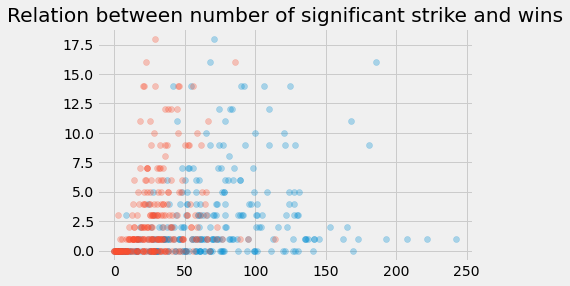

In [41]:
#@title The relation between the number of significant strike (landed and attempts) to winning
a = lightweight[['avg_SIG_STR_att', 'avg_SIG_STR_landed', 'wins']]


plt.scatter(a['avg_SIG_STR_att'], a['wins'], alpha = 0.3)
plt.scatter(a['avg_SIG_STR_landed'], a['wins'], alpha = 0.3)
plt.title('Relation between number of significant strike and wins')
plt.show()

### 3. How about the significant strike accuracy with wins?

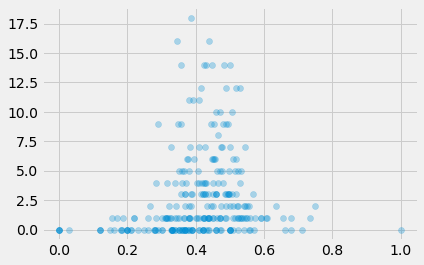

In [42]:
#@title Testing the correlation between significant strike accuracy with winning
a= lightweight[['avg_SIG_STR_pct', 'wins']]

plt.scatter(a['avg_SIG_STR_pct'], a['wins'], alpha = 0.3)
plt.show()

### 4. Testing the correlation between total significant strike and win rate

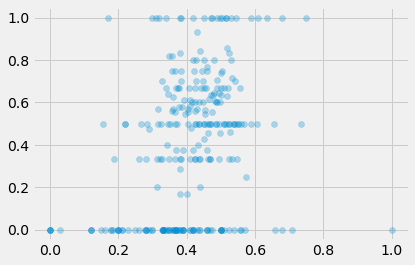

,avg_SIG_STR_att,avg_SIG_STR_landed,avg_SIG_STR_pct,win_pct,wins
avg_SIG_STR_att,1.000000,0.928216,0.072411,0.308719,0.262290
avg_SIG_STR_landed,0.928216,1.000000,0.302451,0.377961,0.295908
avg_SIG_STR_pct,0.072411,0.302451,1.000000,0.328995,0.159216
win_pct,0.308719,0.377961,0.328995,1.000000,0.526716
wins,0.262290,0.295908,0.159216,0.526716,1.000000


In [43]:
#@title Test the correlation between total significant strike and the wins and winning rate.
a= lightweight[['wins', 'losses' ,'draw', 'avg_SIG_STR_att', 'avg_SIG_STR_landed', 'avg_SIG_STR_pct']]
a['total'] = a['wins'] + a['losses'] + a['draw']
a['win_pct'] = a['wins'] / a['total']

b = a[['avg_SIG_STR_att', 'avg_SIG_STR_landed', 'avg_SIG_STR_pct', 'win_pct', 'wins']]

plt.scatter(a['avg_SIG_STR_pct'], a['win_pct'], alpha = 0.3)
plt.show()
b.corr()

## About time fighting

### 1. Testing the correlation between time_total_fought and win rate

In [44]:
#@title time_total_fought vs winning rate

a = lightweight[['total_time_fought(seconds)', 'wins', 'draw', 'losses']]
a['total'] = a['wins'] + a['draw'] + a['losses']
a['avg_time'] = a['total_time_fought(seconds)']/ a['total']
a['win_rate'] = a['wins'] / a['total']

a.corr()

,total_time_fought(seconds),wins,draw,losses,total,avg_time,win_rate
total_time_fought(seconds),1.000000,0.145342,NaN,0.124100,0.146951,0.455031,0.226261
wins,0.145342,1.000000,NaN,0.726709,0.957990,-0.505438,0.526716
draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
losses,0.124100,0.726709,NaN,1.000000,0.893196,-0.460739,0.079349
total,0.146951,0.957990,NaN,0.893196,1.000000,-0.523213,0.377911
avg_time,0.455031,-0.505438,NaN,-0.460739,-0.523213,1.000000,-0.289352
win_rate,0.226261,0.526716,NaN,0.079349,0.377911,-0.289352,1.000000


In [0]:
# # Cleaning the data of fighters 
# col_name  = ['fighter_name', 'Height', 'Weight', 'Reach', 'Stance']
# red = matches[['R_fighter', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms', 'R_Stance']]
# red.columns = col_name
# blue = matches[['B_fighter', 'B_Height_cms', 'B_Weight_lbs', 'B_Reach_cms', 'B_Stance']]
# blue.columns = col_name

# new_fighters = pd.concat([red, blue])

# new_fighters = new_fighters.drop_duplicates('fighter_name', keep= 'first')

# new_fighters = pd.merge(fighters, new_fighters, on = 'fighter_name', how = 'inner').dropna().drop_duplicates('fighter_name')
# new_fighters.drop('DOB', axis = 1)

In [0]:
#Split dataset into different categories
# Different categories about performance of an UFC fighter
  # Columns contain information about 'Target': HEAD, BODY, LEG
  # Columns contain information about 'Position': CLINCH, GROUND, DISTANCE, PASS, REV
  # Columns contain information about 'Win method': Decision_Majority, Decision_Split, Decision_Unanimous, KO/TKO, Submission
  # Columns contain information about 'fighting results': lose_streak, win_streak, draw, losses, wins
  # Columns contain information about 'fighting records': avg_sig_str, total_str, TD, rounds_fought, time_fought, title_bouts, date, match_index
  # Columns contain other information

# target_list = []
# position_list = []
# win_method_list = []
# fighting_results_list = []
# fighting_record_list = []

# for col in fighter_performance:
#   if re.findall(r'fighter|HEAD|BODY|LEG', col):
#     target_list.append(col)
#   if re.findall(r'fighter|CLINCH|GROUND|DISTANCE', col):
#     position_list.append(col)
#   if re.findall(r'fighter|Decision_Majority|Decision_Split|Decision_Unanimous|KO|Submission|TKO', col):
#     win_method_list.append(col)
#   if re.findall(r'fighter|lose_streak|win_streak|draw|losses|wins', col):
#     fighting_results_list.append(col)
#   if re.findall(r'fighter|STR|TD|rounds|time|title|date|match_index', col):
#     fighting_record_list.append(col)

# fighter_target = fighter_performance[target_list]
# fighter_position = fighter_performance[position_list]
# fighter_win = fighter_performance[win_method_list]
# fighter_record = fighter_performance[fighting_results_list]
# fighter_agg_stat = fighter_performance[fighting_record_list]
